In [1]:
%pylab inline
from app.analysis import Quote
quote = Quote(Quote.screen_funds('Industries', max_expense=.6), 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
from 2019-07-12 to 2019-09-20 - 65


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

30


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
ITB,46,0.173994,0.383681,0.434869,8.225107,3.565066
GDX,46,0.131483,0.994576,0.125018,9.462043,13.925691
ITA,46,0.129592,0.405709,0.301815,4.191914,5.676062
XAR,46,0.129408,0.423723,0.288549,3.969001,5.798054
SOXX,46,0.126129,0.866194,0.137367,4.140770,12.139906
SMH,46,0.122929,0.837965,0.138175,4.113783,12.180680
XLU,46,0.108333,0.237680,0.425740,6.193613,3.215799
VPU,46,0.105819,0.237972,0.414654,5.880167,3.267252
PPA,46,0.104699,0.399552,0.244165,3.195181,5.009724


evicted IYF 0.896 -0.448
evicted XLB 0.833 -0.325
evicted VDC 0.729 -0.278
evicted PPA 0.896 -0.116
evicted IHI 0.765 0.003
evicted ITA 0.657 -0.139
evicted SMH 0.356 -0.354
evicted GDXJ 0.095 -0.427
retry backlogs ['VPU', 'XLF', 'KBE', 'VFH', 'IYG', 'XLP', 'FNCL', 'IYJ', 'IDU', 'VIS', 'XLI', 'XAR', 'IXN', 'QTEC', 'IYW', 'XT', 'SOXX', 'TDIV', 'KRE', 'GDX'] at 0.905/-0.51 - 0.515
evicted XLP 0.646 -0.152
evicted XAR 0.685 -0.168
evicted SOXX 0.395 -0.420
evicted GDX 0.223 -0.387
retry backlogs ['VPU', 'XLF', 'KBE', 'VIS', 'QTEC', 'IDU', 'IXN', 'IYJ', 'XLI', 'XT', 'IYW', 'IYG', 'TDIV', 'FNCL', 'VFH', 'KRE'] at 0.910/-0.52 - 0.515
evicted QTEC 0.909 0.119
evicted KRE 0.485 -0.171
retry backlogs ['XLF', 'KBE', 'IDU', 'FNCL', 'VPU', 'VFH', 'IXN', 'IYW', 'IYJ', 'XLI', 'VIS', 'XT', 'TDIV', 'IYG'] at 0.915/-0.53 - 0.515
evicted KBE 0.487 -0.153
retry backlogs ['XLF', 'IDU', 'FNCL', 'VPU', 'VFH', 'IYJ', 'VIS', 'XLI', 'XT', 'IXN', 'IYW', 'TDIV', 'IYG'] at 0.920/-0.54 - 0.515
evicted IYG 0.486 0.

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,46.0,0.133016,0.244216,-0.401878,-0.005122,0.154774,0.285904,0.727765,0.515418,6.957455,2.587170
ITB,46.0,0.173994,0.383681,-0.722805,-0.110735,0.204903,0.401195,1.140148,0.434869,8.225107,3.565066
XLU,46.0,0.108333,0.237680,-0.497281,-0.003475,0.134488,0.249148,0.584624,0.425740,6.193613,3.215799


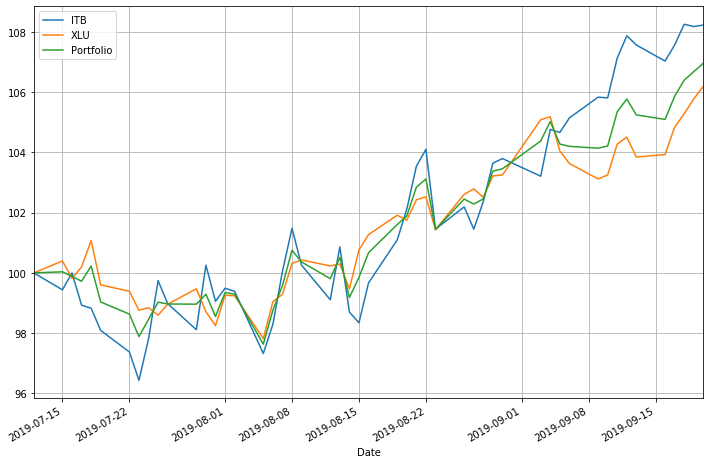

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['ITB', 'XLU'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,46.0,0.133279,0.244695,-0.403918,-0.003816,0.155827,0.288251,0.729294,0.515484,6.965580,2.580425
ITB,46.0,0.173994,0.383681,-0.722805,-0.110735,0.204903,0.401195,1.140148,0.434869,8.225107,3.565066
XLU,46.0,0.108333,0.237680,-0.497281,-0.003475,0.134488,0.249148,0.584624,0.425740,6.193613,3.215799


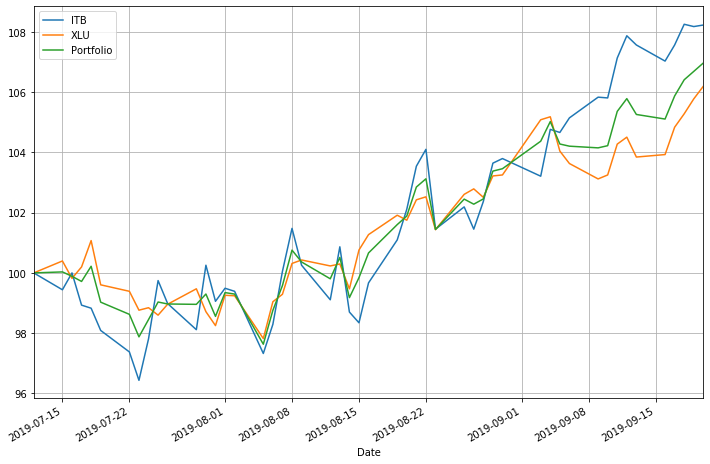

In [4]:
quote.setup_mask(['ITB', 'XLU'])
quote.graph({'ITB': 0.38, 'XLU': 0.62})